# Decision Tree
#### Submitted by Maria Eloisa H. Garcia
---

# Instructions

1. Choose a dataset from https://archive.ics.uci.edu/datasets.
2. Your dataset should be unique to that of your classmate, so be sure to discuss with them, otherwise no points will be given into this assignment.
3. 

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

## EDA

In [104]:
headers = ["area", "perimeter", "compactness", "length", "width", "assymetry", "groove_len", "label"]
df = pd.read_csv('seeds_dataset.txt', delimiter=r'\s+', header=None, names=headers)

df.head()

,area,perimeter,compactness,length,width,assymetry,groove_len,label
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


### Missing Data

The Seeds dataset does not have missing values.

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   area         210 non-null    float64
 1   perimeter    210 non-null    float64
 2   compactness  210 non-null    float64
 3   length       210 non-null    float64
 4   width        210 non-null    float64
 5   assymetry    210 non-null    float64
 6   groove_len   210 non-null    float64
 7   label        210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.3 KB


In [106]:
df.isna().sum()

area           0
perimeter      0
compactness    0
length         0
width          0
assymetry      0
groove_len     0
label          0
dtype: int64

### Visualization

<Axes: xlabel='area', ylabel='label'>

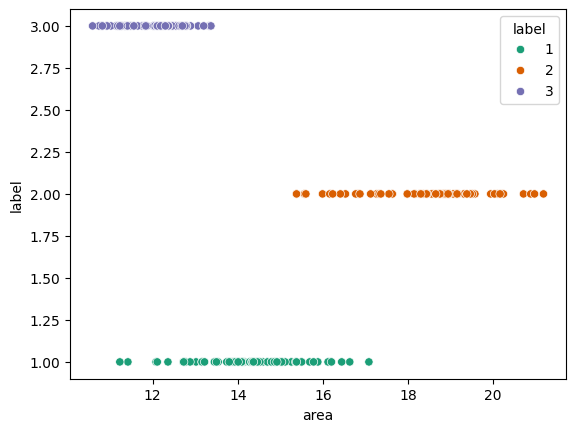

In [107]:
sns.scatterplot(x='area',y='label',data=df,hue='label',palette='Dark2')

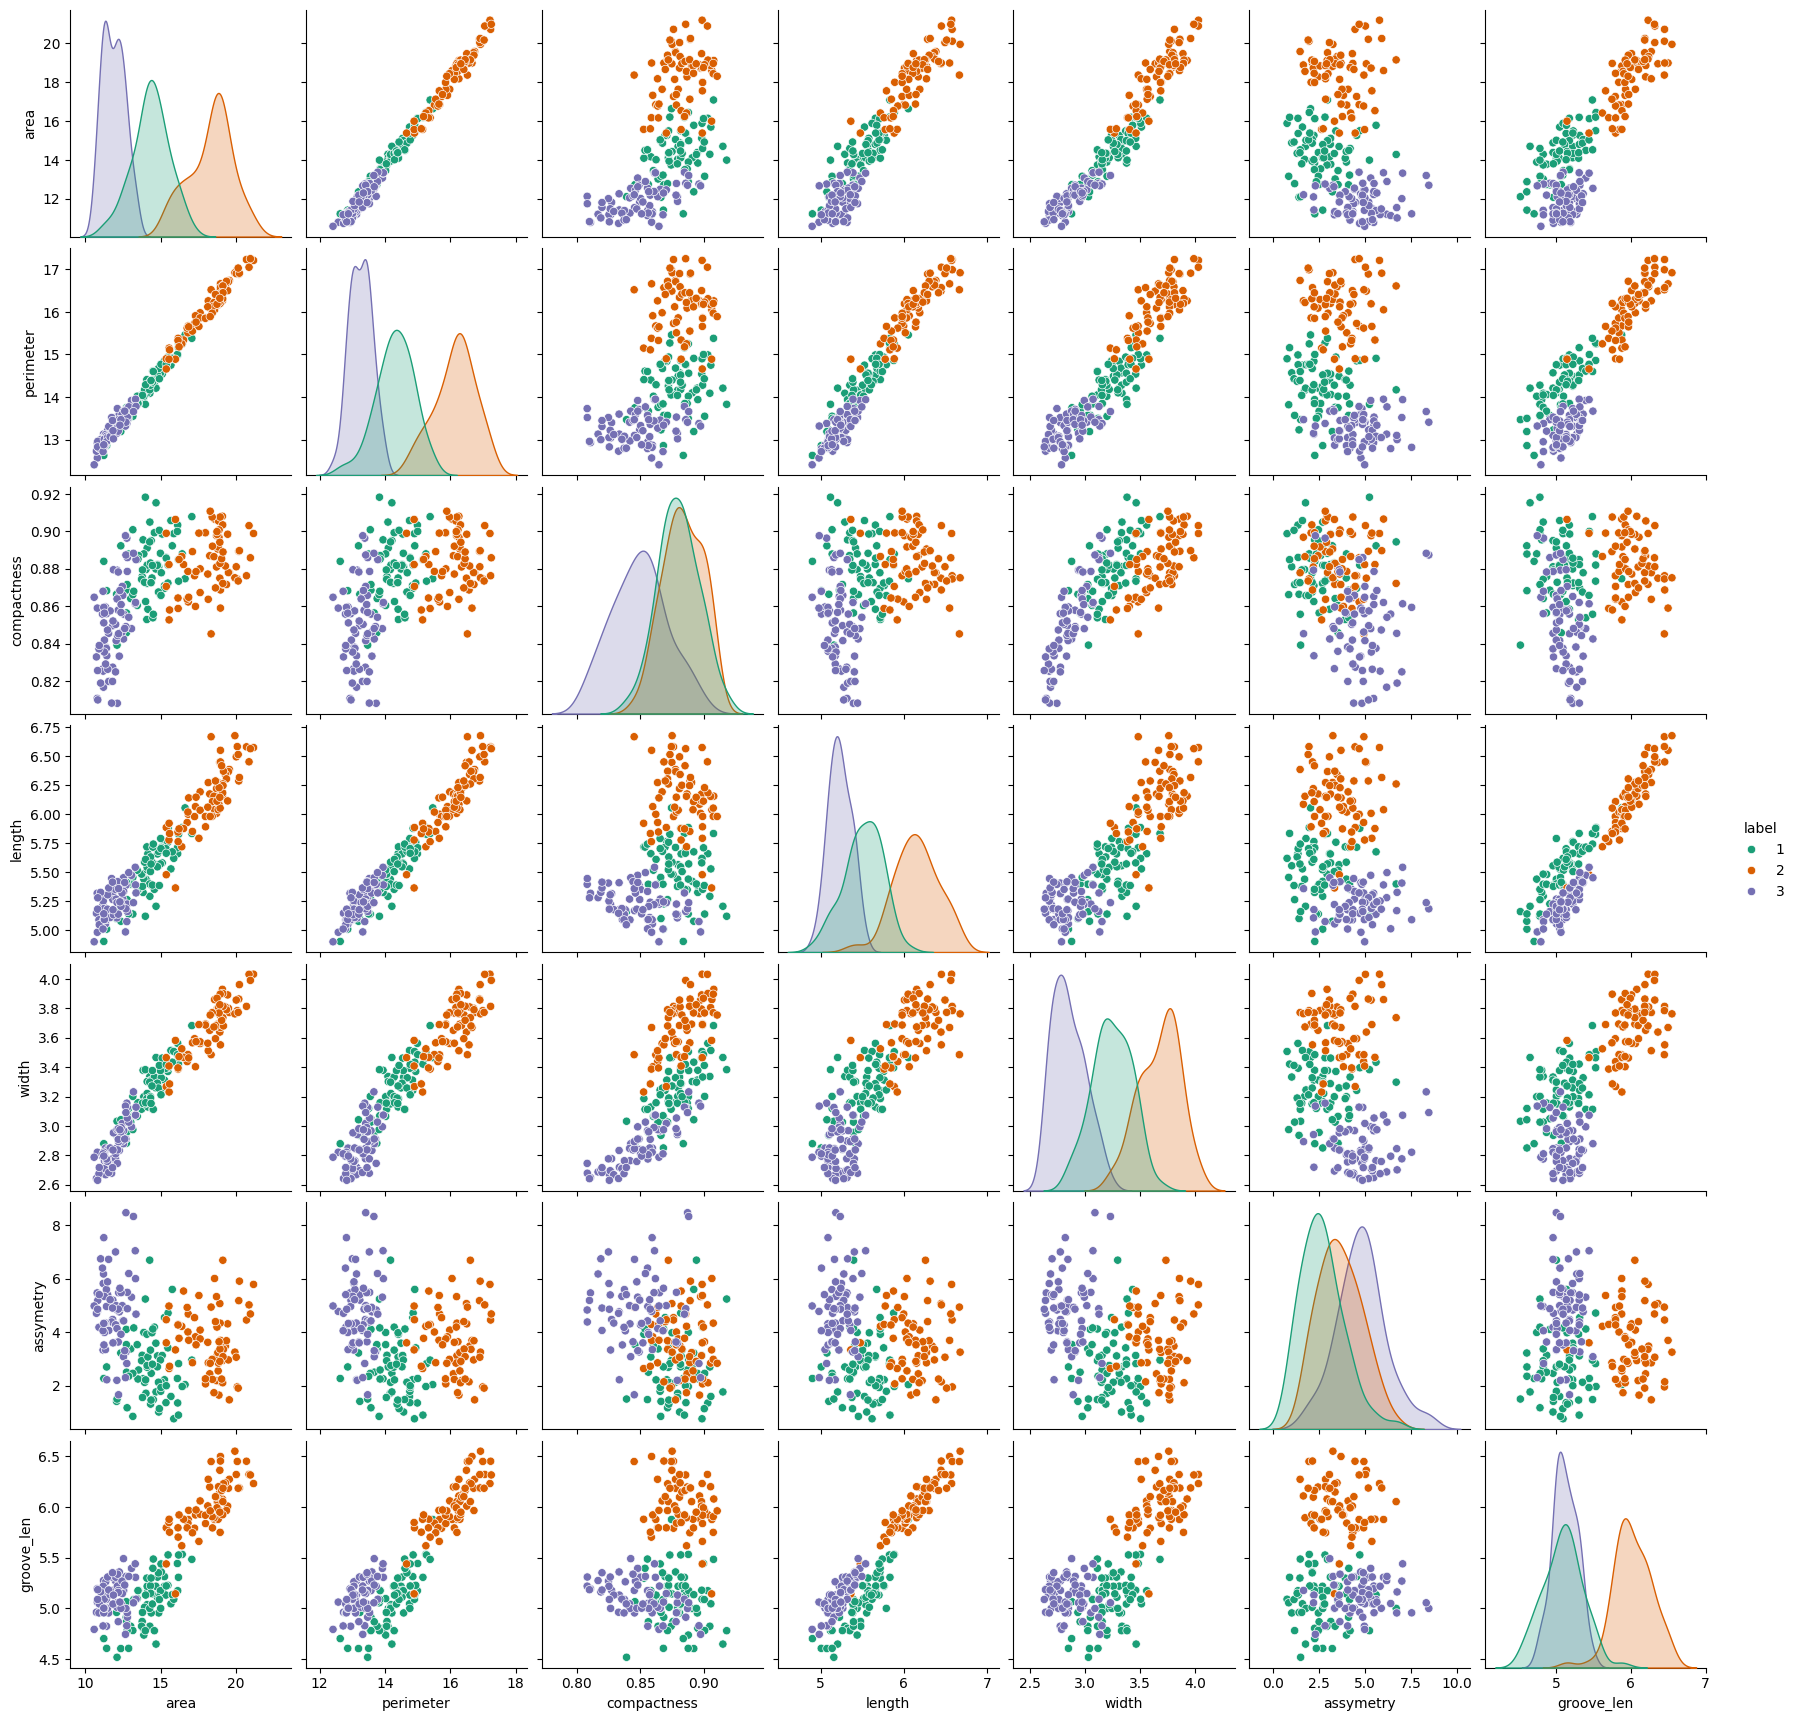

In [108]:
sns.pairplot(df,hue='label',palette='Dark2')

## Train | Test Split

In [109]:
X = df.drop('label',axis=1)
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Decision Tree Classifier

### Default Hyperparameters

In [110]:
model = DecisionTreeClassifier()

model.fit(X_train,y_train)

DecisionTreeClassifier()

In [111]:
base_pred = model.predict(X_test)

## Evaluation

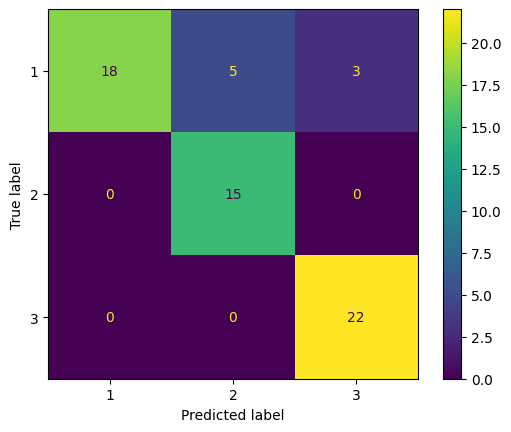

In [112]:
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

cmd.plot()
plt.show()

In [113]:
print(classification_report(y_test,base_pred))

              precision    recall  f1-score   support

           1       1.00      0.69      0.82        26
           2       0.75      1.00      0.86        15
           3       0.88      1.00      0.94        22

    accuracy                           0.87        63
   macro avg       0.88      0.90      0.87        63
weighted avg       0.90      0.87      0.87        63



In [114]:
model.feature_importances_

array([0.0163971 , 0.30510842, 0.        , 0.0163971 , 0.02909808,
       0.06090789, 0.57209141])

In [115]:
pd.DataFrame(index=df.drop('label', axis=1).columns,data=model.feature_importances_,columns=['Feature Importance'])

,Feature Importance
area,0.016397
perimeter,0.305108
compactness,0.000000
length,0.016397
width,0.029098
assymetry,0.060908
groove_len,0.572091


## Visualize the Tree

[Text(0.6590909090909091, 0.9285714285714286, 'x[6] <= 5.555\ngini = 0.664\nsamples = 147\nvalue = [44.0, 55.0, 48.0]'),
 Text(0.4090909090909091, 0.7857142857142857, 'x[1] <= 13.74\ngini = 0.519\nsamples = 93\nvalue = [43, 2, 48]'),
 Text(0.18181818181818182, 0.6428571428571429, 'x[6] <= 4.803\ngini = 0.233\nsamples = 52\nvalue = [7, 0, 45]'),
 Text(0.09090909090909091, 0.5, 'x[3] <= 4.996\ngini = 0.32\nsamples = 5\nvalue = [4, 0, 1]'),
 Text(0.045454545454545456, 0.35714285714285715, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.13636363636363635, 0.35714285714285715, 'gini = 0.0\nsamples = 4\nvalue = [4, 0, 0]'),
 Text(0.2727272727272727, 0.5, 'x[5] <= 1.538\ngini = 0.12\nsamples = 47\nvalue = [3.0, 0.0, 44.0]'),
 Text(0.22727272727272727, 0.35714285714285715, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.3181818181818182, 0.35714285714285715, 'x[1] <= 13.55\ngini = 0.083\nsamples = 46\nvalue = [2, 0, 44]'),
 Text(0.2727272727272727, 0.21428571428571427, 'gini = 0.

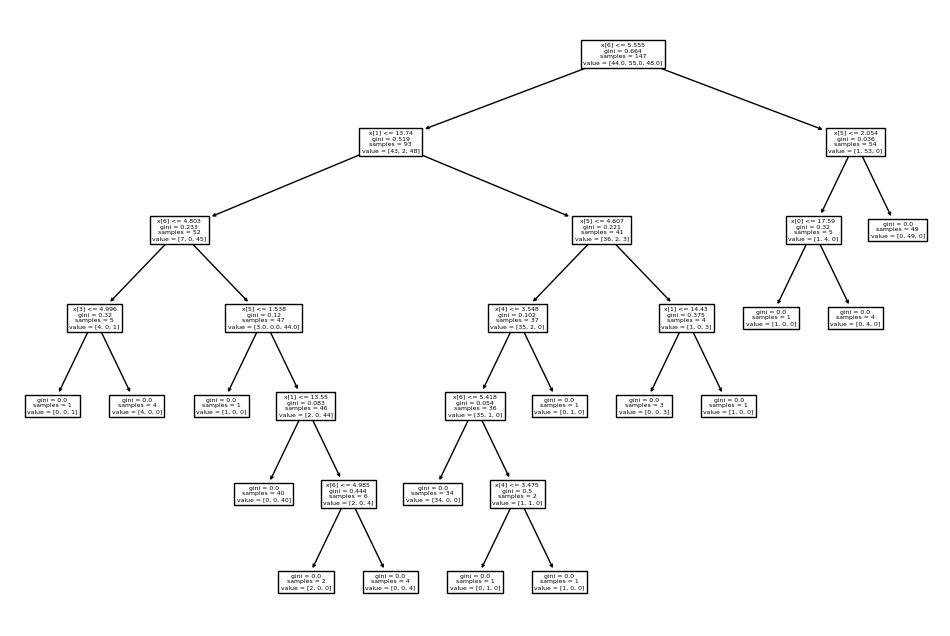

In [116]:
plt.figure(figsize=(12,8))
plot_tree(model)

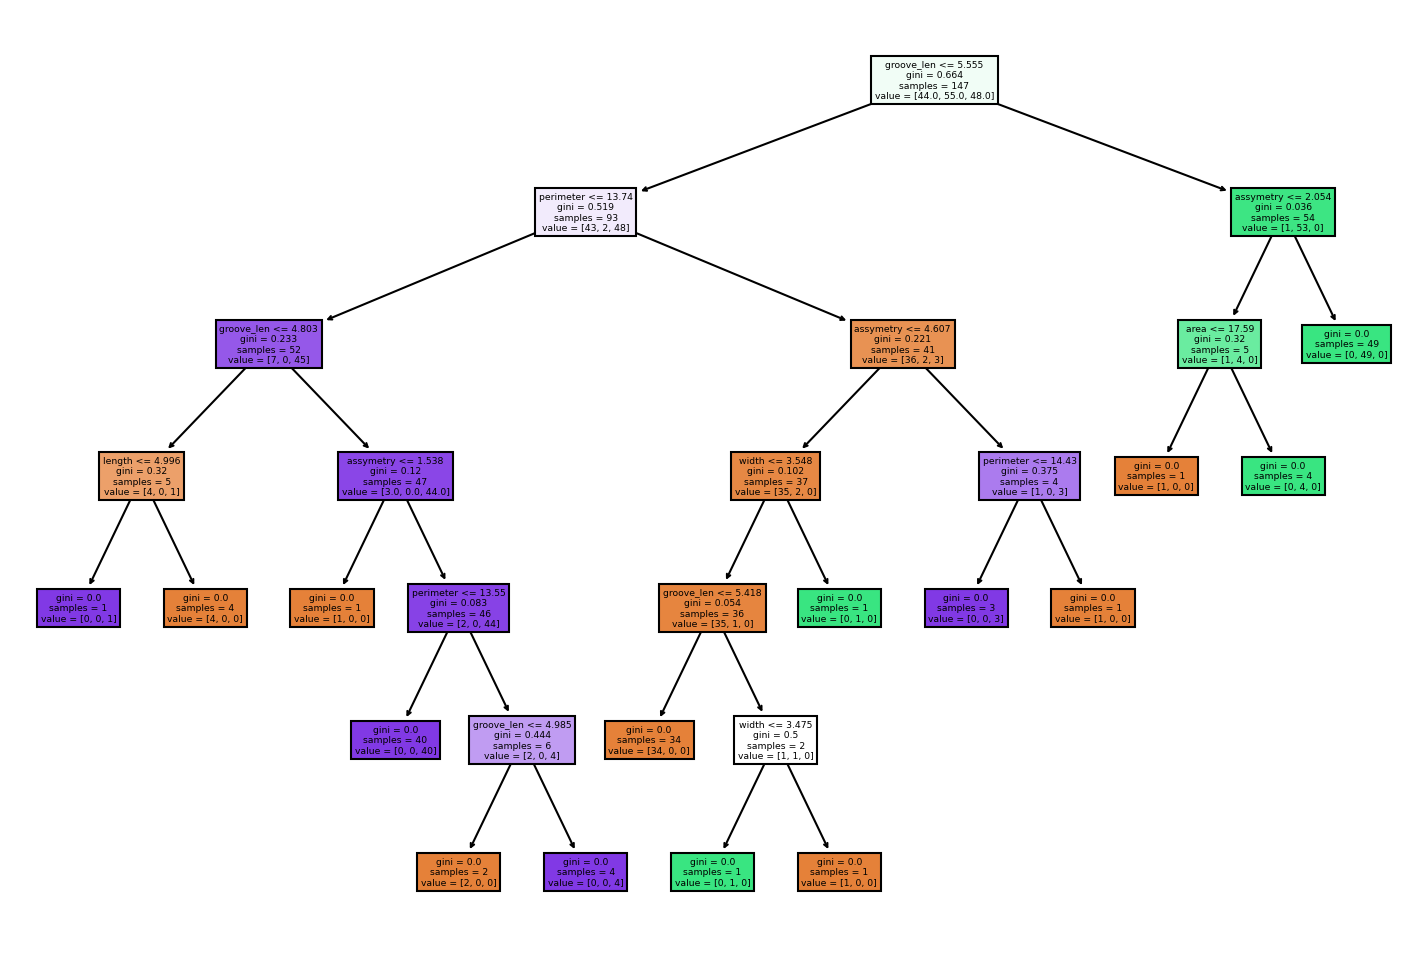

In [117]:
plt.figure(figsize=(12,8),dpi=150)
plot_tree(model,filled=True,feature_names=df.drop('label', axis=1).columns,);

## Reporting Model Results

In [118]:
def report_model(model):
    model_preds = model.predict(X_test)
    print(classification_report(y_test,model_preds))
    print('\n')
    plt.figure(figsize=(12,8),dpi=150)
    plot_tree(model,filled=True,feature_names=df.drop('label', axis=1).columns,);

## Understanding Hyperparameters

### Max Depth

In [119]:
pruned_tree = DecisionTreeClassifier(max_depth=2)
pruned_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

              precision    recall  f1-score   support

           1       0.92      0.88      0.90        26
           2       1.00      1.00      1.00        15
           3       0.87      0.91      0.89        22

    accuracy                           0.92        63
   macro avg       0.93      0.93      0.93        63
weighted avg       0.92      0.92      0.92        63





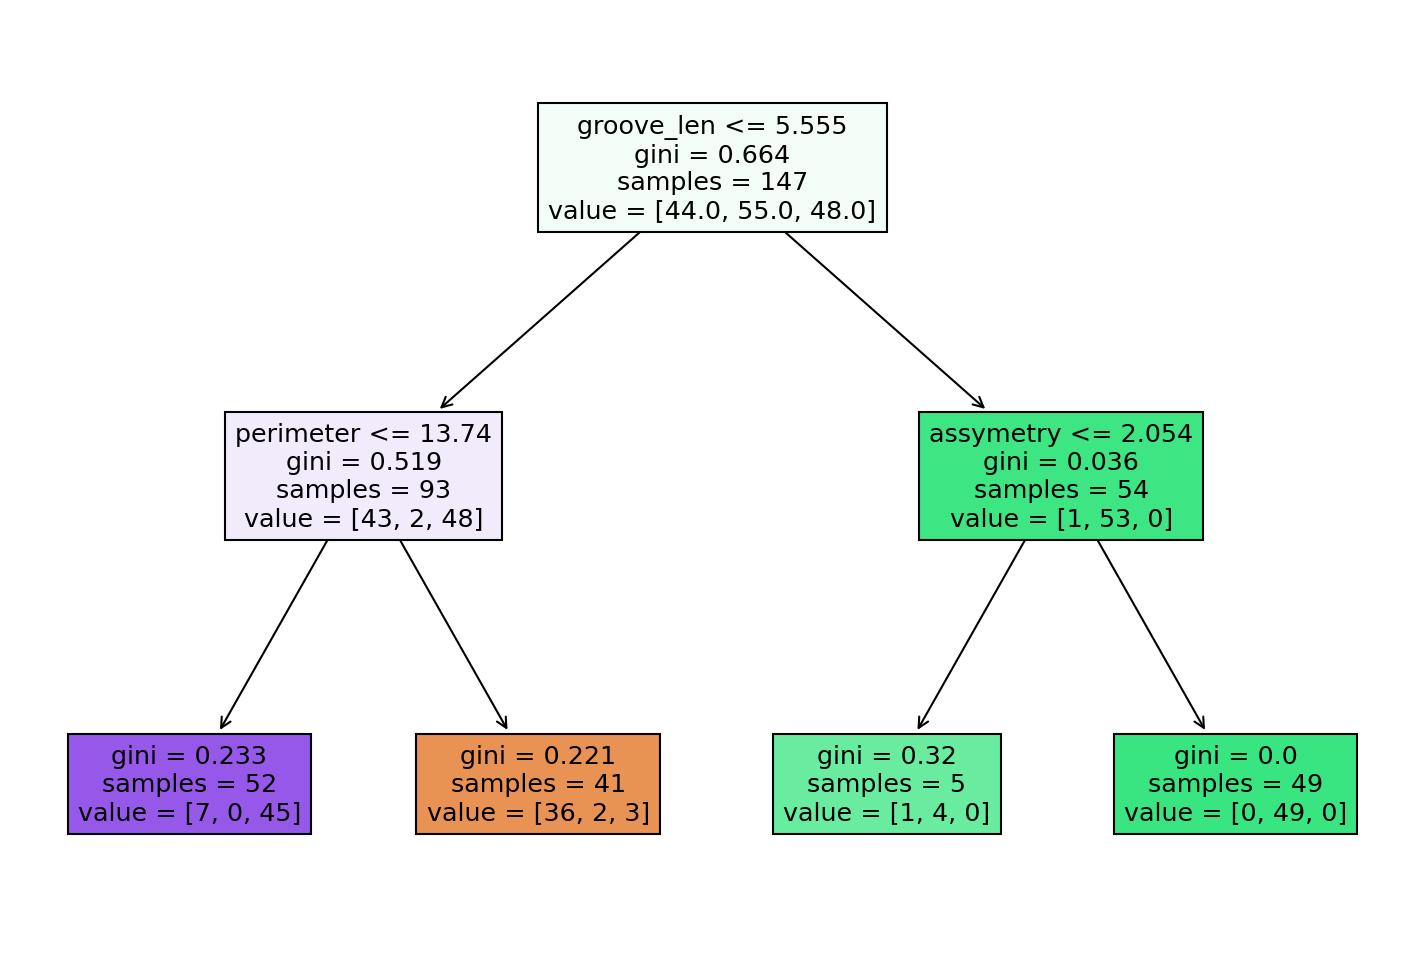

In [120]:
report_model(pruned_tree)

## Max Leaf Nodes

In [121]:
pruned_tree = DecisionTreeClassifier(max_leaf_nodes=3)
pruned_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=3)

              precision    recall  f1-score   support

           1       0.92      0.88      0.90        26
           2       1.00      1.00      1.00        15
           3       0.87      0.91      0.89        22

    accuracy                           0.92        63
   macro avg       0.93      0.93      0.93        63
weighted avg       0.92      0.92      0.92        63





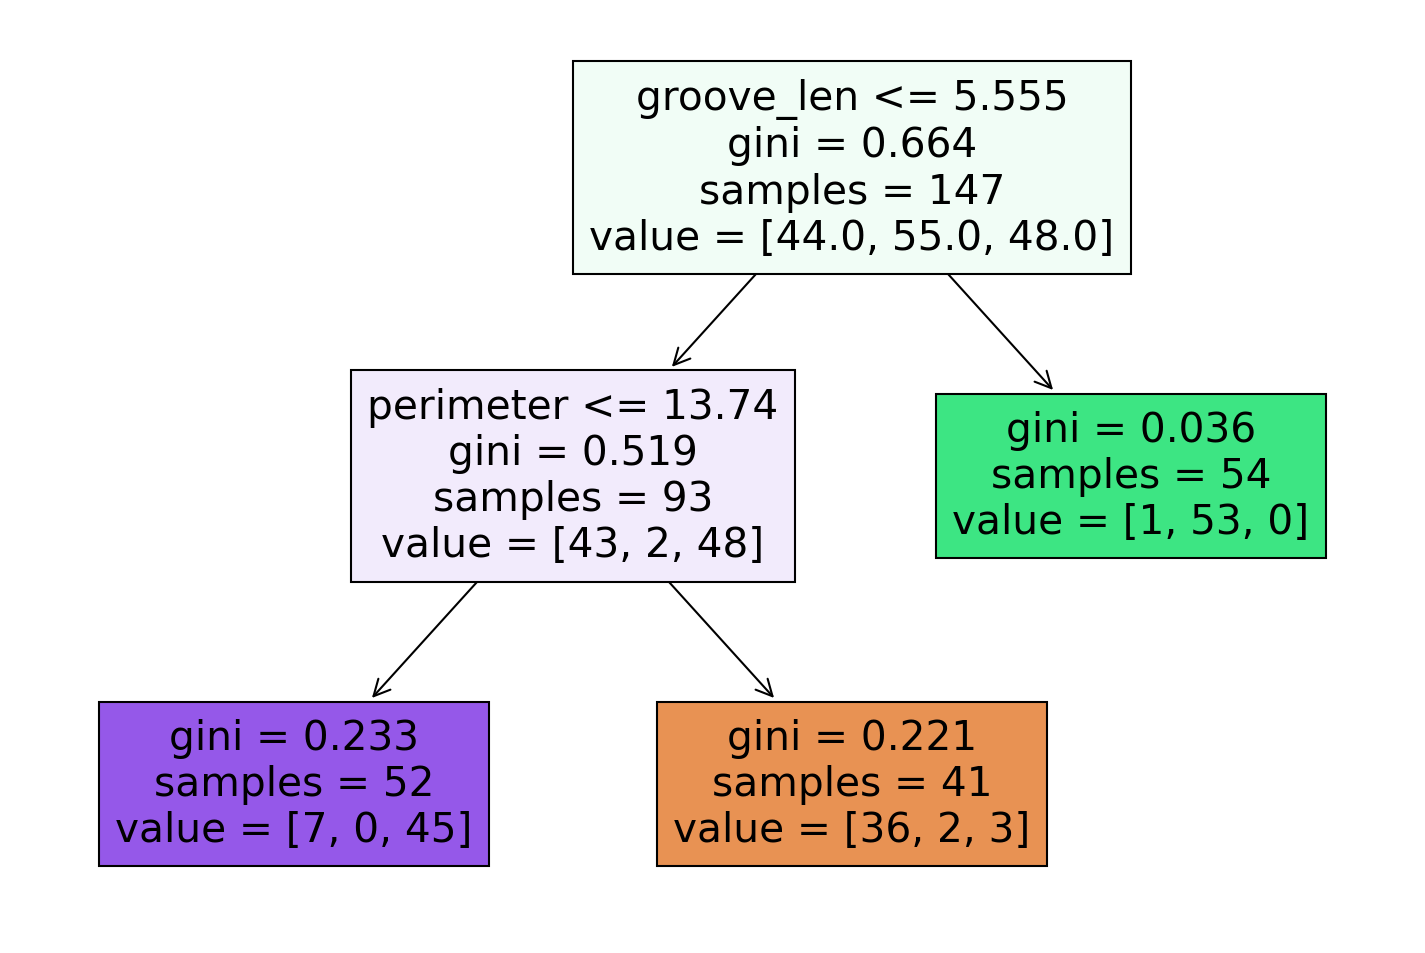

In [122]:
report_model(pruned_tree)

## Criterion

In [123]:
entropy_tree = DecisionTreeClassifier(criterion='entropy')
entropy_tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

              precision    recall  f1-score   support

           1       0.95      0.73      0.83        26
           2       0.79      1.00      0.88        15
           3       0.88      0.95      0.91        22

    accuracy                           0.87        63
   macro avg       0.87      0.90      0.87        63
weighted avg       0.89      0.87      0.87        63





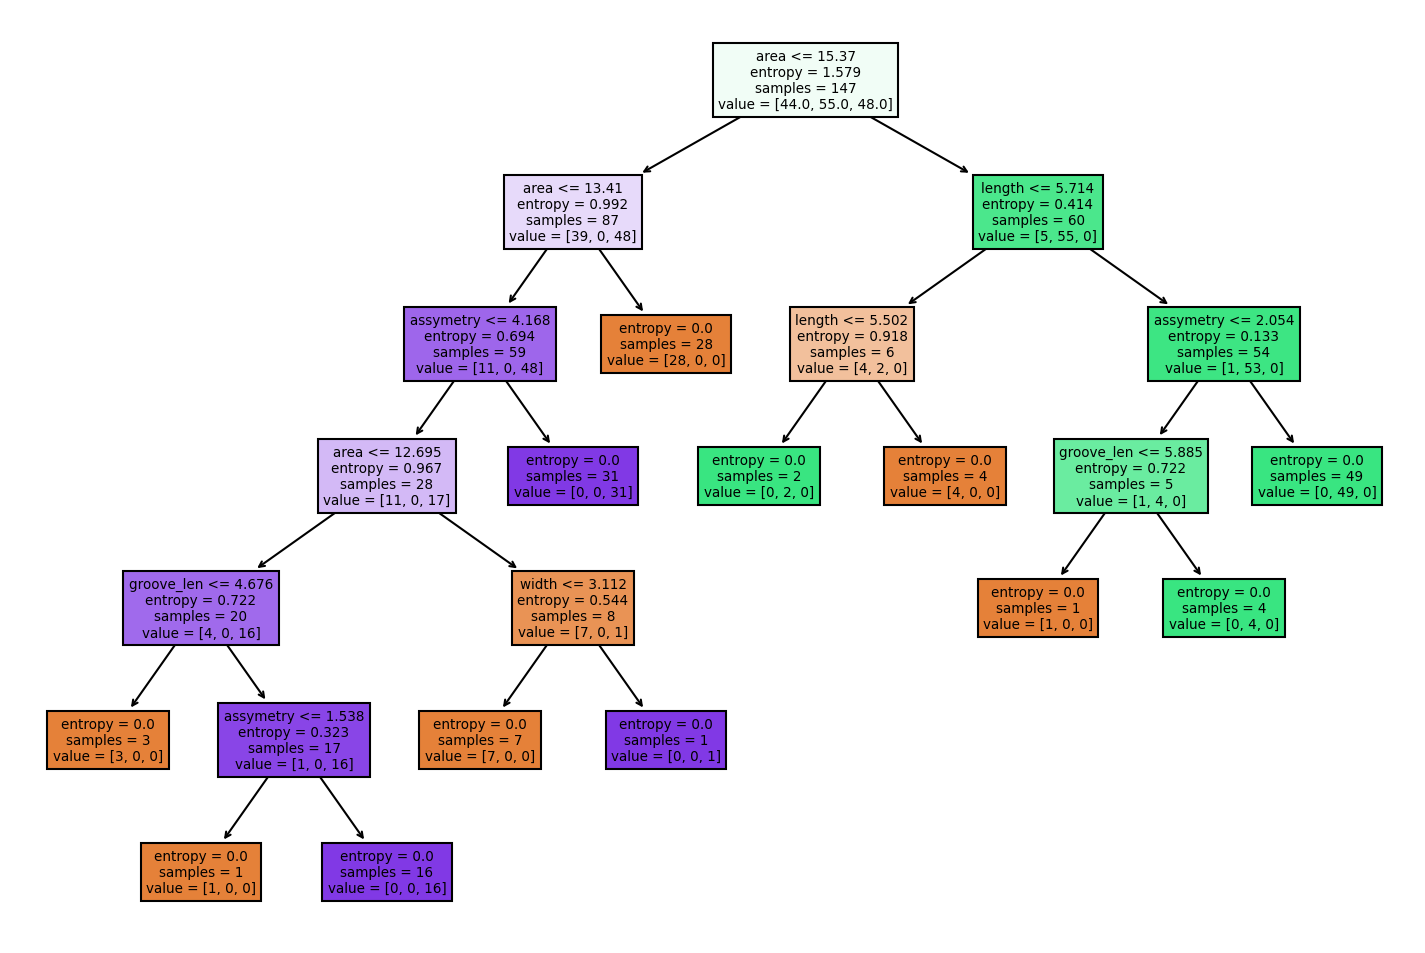

In [124]:
report_model(entropy_tree)